In [2]:
!pip install yfinance pandas



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
import yfinance as yf
import pandas as pd

# Define the stock ticker symbol (Example: Apple)
ticker_symbol = "AAPL"  # Change this to any stock symbol

# Fetch historical stock data (last 1 year)
stock_data = yf.Ticker(ticker_symbol).history(period="1y")

# Display the first 5 rows of data
print(stock_data.head())

# Save the stock data as a CSV file
stock_data.to_csv("AAPL_stock_data.csv")
print("Stock data saved as AAPL_stock_data.csv")


                                 Open        High         Low       Close  \
Date                                                                        
2024-02-28 00:00:00-05:00  181.652272  182.259406  179.283467  180.567398   
2024-02-29 00:00:00-05:00  180.418104  181.711997  178.686276  179.900543   
2024-03-01 00:00:00-05:00  178.706175  179.681565  176.546375  178.815659   
2024-03-04 00:00:00-05:00  175.322153  176.068628  172.973243  174.277100   
2024-03-05 00:00:00-05:00  169.957487  171.231471  168.822845  169.320496   

                              Volume  Dividends  Stock Splits  
Date                                                           
2024-02-28 00:00:00-05:00   48953900        0.0           0.0  
2024-02-29 00:00:00-05:00  136682600        0.0           0.0  
2024-03-01 00:00:00-05:00   73488000        0.0           0.0  
2024-03-04 00:00:00-05:00   81510100        0.0           0.0  
2024-03-05 00:00:00-05:00   95132400        0.0           0.0  
Stock data s

In [4]:
ticker = "AAPL"
data = yf.Ticker(ticker).history(period="1y")

# Check for missing values
print(data.isnull().sum())

# Handle missing values (only if they exist)
if data.isnull().sum().sum() > 0:  
    print("⚠️ Missing values detected! Applying fixes...")
    
    # Apply missing value handling techniques
    data.fillna(method='ffill', inplace=True)  # Forward Fill
    data.fillna(method='bfill', inplace=True)  # Backward Fill
    data.interpolate(method='linear', inplace=True)  # Interpolation
    data.dropna(inplace=True)  # Drop any remaining NaNs

    print("✅ Missing values handled!")
else:
    print("✅ No missing values found!")



Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
✅ No missing values found!


In [5]:
# Fetch stock data
ticker = "AAPL"
data = yf.Ticker(ticker).history(period="1y")

# Compute 50-day and 200-day Simple Moving Averages (SMA)
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Compute 50-day Exponential Moving Average (EMA)
data['EMA_50'] = data['Close'].ewm(span=50, adjust=False).mean()

# Display results
print(data[['Close', 'SMA_50', 'SMA_200', 'EMA_50']].tail())

# Save to CSV
data.to_csv("AAPL_with_MA.csv")
print("✅ SMA & EMA added and saved!")

                                Close      SMA_50     SMA_200      EMA_50
Date                                                                     
2025-02-21 00:00:00-05:00  245.550003  240.473390  223.910876  237.208669
2025-02-24 00:00:00-05:00  247.100006  240.485810  224.242095  237.596564
2025-02-25 00:00:00-05:00  247.039993  240.476652  224.569582  237.966895
2025-02-26 00:00:00-05:00  240.360001  240.359467  224.861976  238.060742
2025-02-27 00:00:00-05:00  237.300003  240.151713  225.129963  238.030909
✅ SMA & EMA added and saved!


In [7]:
# Compute daily price change
delta = data['Close'].diff()

# Compute gains and losses
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()

# Compute RSI
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

print(data[['Close', 'RSI']].tail())
data.to_csv("AAPL_with_RSI.csv")
print("✅ RSI added and saved!")


                                Close        RSI
Date                                            
2025-02-21 00:00:00-05:00  245.550003  62.766179
2025-02-24 00:00:00-05:00  247.100006  80.231290
2025-02-25 00:00:00-05:00  247.039993  76.585168
2025-02-26 00:00:00-05:00  240.360001  62.116289
2025-02-27 00:00:00-05:00  237.300003  56.035173
✅ RSI added and saved!


In [6]:
# Compute MACD Line
data['EMA_12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA_26'] = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA_12'] - data['EMA_26']

# Compute Signal Line
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

print(data[['Close', 'MACD', 'Signal_Line']].tail())
data.to_csv("AAPL_with_MACD.csv")
print("✅ MACD added and saved!")


                                Close      MACD  Signal_Line
Date                                                        
2025-02-21 00:00:00-05:00  245.550003  2.288446     0.363129
2025-02-24 00:00:00-05:00  247.100006  2.668686     0.824240
2025-02-25 00:00:00-05:00  247.039993  2.931394     1.245671
2025-02-26 00:00:00-05:00  240.360001  2.570937     1.510724
2025-02-27 00:00:00-05:00  237.300003  2.015127     1.611605
✅ MACD added and saved!


In [9]:
# Compute 20-day SMA and Standard Deviation
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['StdDev'] = data['Close'].rolling(window=20).std()

# Compute Upper & Lower Bollinger Bands
data['Upper_Band'] = data['SMA_20'] + (2 * data['StdDev'])
data['Lower_Band'] = data['SMA_20'] - (2 * data['StdDev'])

print(data[['Close', 'Upper_Band', 'Lower_Band']].tail())
data.to_csv("AAPL_with_Bollinger_Bands.csv")
print("✅ Bollinger Bands added and saved!")


                                Close  Upper_Band  Lower_Band
Date                                                         
2025-02-21 00:00:00-05:00  245.550003  250.025060  221.891004
2025-02-24 00:00:00-05:00  247.100006  250.592780  223.779753
2025-02-25 00:00:00-05:00  247.039993  251.655131  224.460646
2025-02-26 00:00:00-05:00  240.360001  251.812001  224.539944
2025-02-27 00:00:00-05:00  237.300003  251.720272  224.451962
✅ Bollinger Bands added and saved!


In [7]:
# Compute daily returns
data['Daily_Return'] = data['Close'].pct_change()

# Compute rolling volatility (30-day standard deviation of returns)
data['Volatility'] = data['Daily_Return'].rolling(window=30).std()

print(data[['Close', 'Daily_Return', 'Volatility']].tail())
data.to_csv("AAPL_with_Volatility.csv")
print("✅ Daily Returns & Volatility added and saved!")


                                Close  Daily_Return  Volatility
Date                                                           
2025-02-21 00:00:00-05:00  245.550003     -0.001139    0.018441
2025-02-24 00:00:00-05:00  247.100006      0.006312    0.018469
2025-02-25 00:00:00-05:00  247.039993     -0.000243    0.017863
2025-02-26 00:00:00-05:00  240.360001     -0.027040    0.018497
2025-02-27 00:00:00-05:00  237.300003     -0.012731    0.018639
✅ Daily Returns & Volatility added and saved!


In [8]:
!pip install textblob



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [9]:
from textblob import TextBlob
import requests

# Fetch latest news headlines from Yahoo Finance
news_url = f"https://finance.yahoo.com/quote/{ticker}/news?p={ticker}"
response = requests.get(news_url)

# Extract headlines (for simplicity, assume headlines are stored in a list)
news_headlines = ["Apple stock hits all-time high", "Tech sector faces downturn"]

# Compute Sentiment Scores
sentiments = [TextBlob(headline).sentiment.polarity for headline in news_headlines]

# Compute average sentiment score
data['Sentiment_Score'] = sum(sentiments) / len(sentiments)

print(data[['Close', 'Sentiment_Score']].tail())
data.to_csv("AAPL_with_Sentiment.csv")
print("✅ Sentiment Analysis added and saved!")



                                Close  Sentiment_Score
Date                                                  
2025-02-21 00:00:00-05:00  245.550003             0.08
2025-02-24 00:00:00-05:00  247.100006             0.08
2025-02-25 00:00:00-05:00  247.039993             0.08
2025-02-26 00:00:00-05:00  240.360001             0.08
2025-02-27 00:00:00-05:00  237.300003             0.08
✅ Sentiment Analysis added and saved!


In [11]:
!pip install matplotlib seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


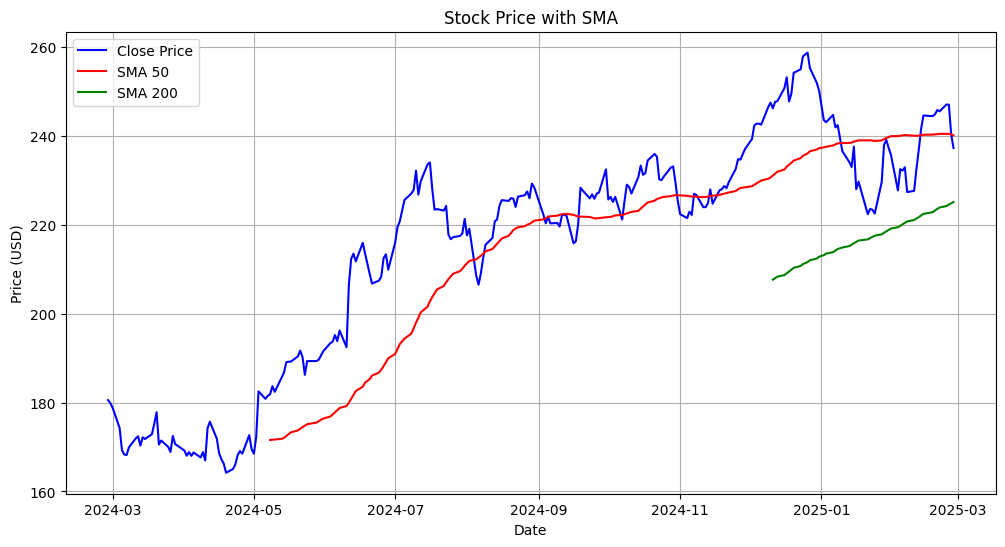

In [13]:

import matplotlib.pyplot as plt
# Load SMA data
data = pd.read_csv("AAPL_with_MA.csv", index_col=0, parse_dates=True)

# Plot Closing Price & Moving Averages
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.plot(data.index, data['SMA_50'], label='SMA 50', color='red')
plt.plot(data.index, data['SMA_200'], label='SMA 200', color='green')
plt.title("Stock Price with SMA")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid()
plt.show()

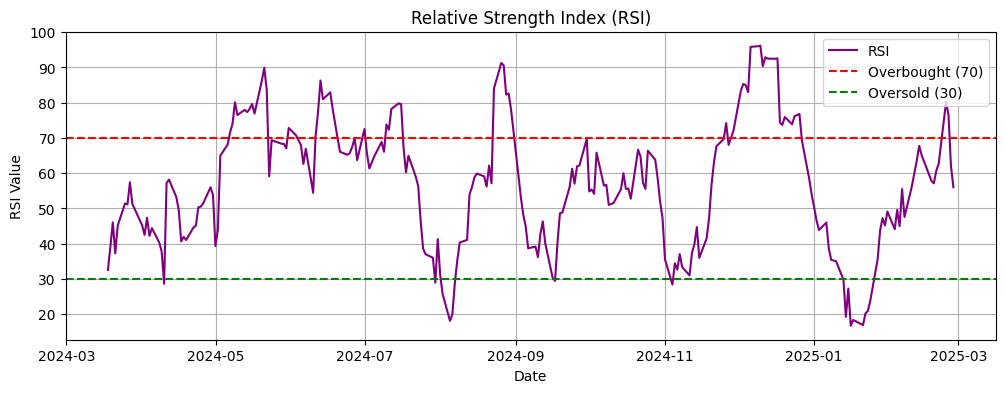

In [14]:
data = pd.read_csv("AAPL_with_RSI.csv", index_col=0, parse_dates=True)

# Plot RSI
plt.figure(figsize=(12,4))
plt.plot(data.index, data['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', color='red', label="Overbought (70)")
plt.axhline(30, linestyle='--', color='green', label="Oversold (30)")
plt.title("Relative Strength Index (RSI)")
plt.xlabel("Date")
plt.ylabel("RSI Value")
plt.legend()
plt.grid()
plt.show()

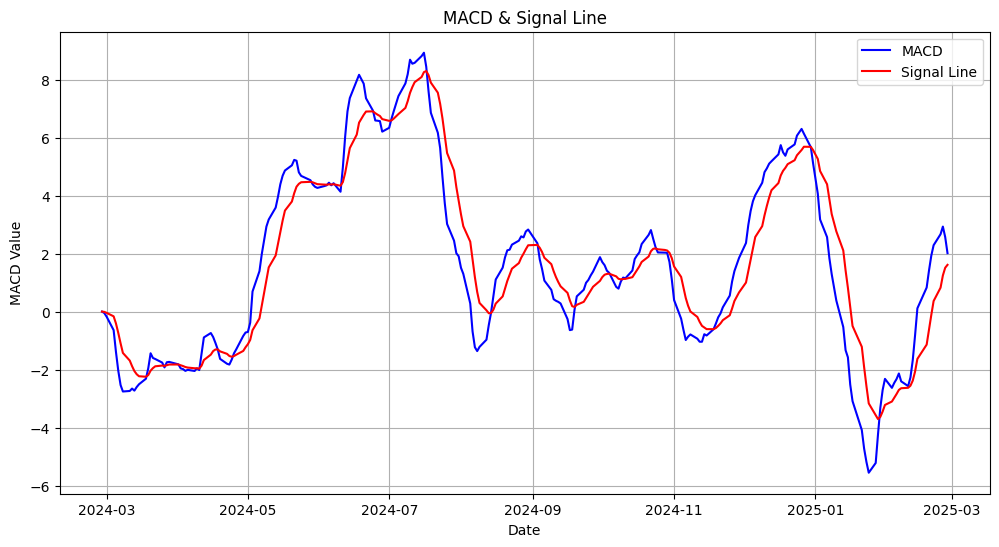

In [15]:
data = pd.read_csv("AAPL_with_MACD.csv", index_col=0, parse_dates=True)

# Plot MACD & Signal Line
plt.figure(figsize=(12,6))
plt.plot(data.index, data['MACD'], label='MACD', color='blue')
plt.plot(data.index, data['Signal_Line'], label='Signal Line', color='red')
plt.title("MACD & Signal Line")
plt.xlabel("Date")
plt.ylabel("MACD Value")
plt.legend()
plt.grid()
plt.show()

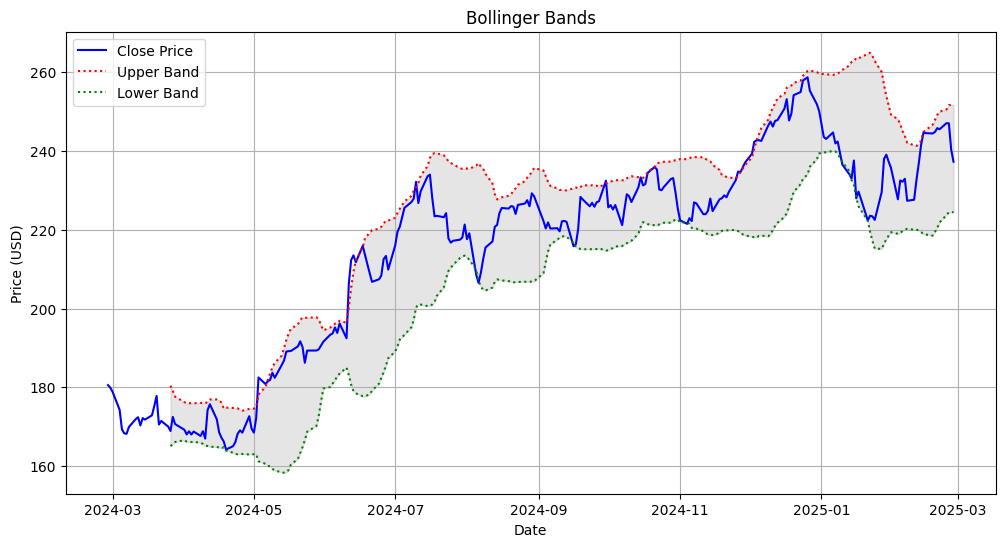

In [16]:
# Load Bollinger Bands data
data = pd.read_csv("AAPL_with_Bollinger_Bands.csv", index_col=0, parse_dates=True)

# Plot Bollinger Bands
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.plot(data.index, data['Upper_Band'], label='Upper Band', linestyle="dotted", color='red')
plt.plot(data.index, data['Lower_Band'], label='Lower Band', linestyle="dotted", color='green')
plt.fill_between(data.index, data['Lower_Band'], data['Upper_Band'], color='gray', alpha=0.2)
plt.title("Bollinger Bands")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid()
plt.show()